For this project it is necesary the dense vector feature https://www.elastic.co/guide/en/elasticsearch/reference/current/dense-vector.html. Bonsai.io do not support it so it is necesary to implement a dedicated server or the Elasticsearch cloud version, you can apply for a 14 day trial to run this notebook on colab with your own ES credentials

## Packages installations

In [ ]:
!pip install elasticsearch
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 24.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=a80261d85c6174bf2a9176a5921eca801dbe6e1ff6c86aa0edd394bfb12af093
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


## Dataset import
This dataset is created by using knowledge graph builded from wikipedia called dbpedia
[dbepedia.org](https://)

In [ ]:
import pandas as pd

In [ ]:
dataset_people = "drive/MyDrive/Colab Notebooks/archive/people-wiki-1000.csv"
pf_df = pd.read_csv(dataset_people)

In [ ]:
pf_df

,Unnamed: 0,URI,name,abstract
0,0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,Digby Morrell (born 10 October 1979) is a form...
1,1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,"Alfred J. Lewy, a.k.a. ""Sandy Lewy"", is an Ame..."
2,2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,"Harpdog Brown (January 28, 1962 – January 7, 2..."
3,3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,Franz Rottensteiner (* 18. Januar 1942 in Waid...
4,5,<http://dbpedia.org/resource/Sam_Henderson>,Sam Henderson,Sam Henderson (kelahiran 18 Oktober 1969) is a...
...,...,...,...,...
856,995,<http://dbpedia.org/resource/Tantely_Andrianar...,Tantely Andrianarivo,René Tantely Gabrio Andrianarivo (born 25 May ...
857,996,<http://dbpedia.org/resource/Terry_Wogan>,Terry Wogan,Ba chraoltóir agus láithreoir teilifíse Éirean...
858,997,<http://dbpedia.org/resource/Mike_LaValliere>,Mike LaValliere,Michael Eugene LaValliere (né le 18 août 1960 ...
859,998,<http://dbpedia.org/resource/Benjamin_Vogt_(po...,Benjamin Vogt (poet),بنجامين فوجت (بالإنجليزية: Benjamin Vogt)‏ هو ...


Let's see an example

In [ ]:
pf_df.iloc[0].abstract

"Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL). From Western Australia, Morrell played his early senior football for West Perth. His 44-game senior career for the Falcons spanned 1998–2000, and he was the club's leading goalkicker in 2000. At the age of 21, Morrell was recruited to the Australian Football League by the Kangaroos Football Club with its third round selection in the 2001 AFL Rookie Draft. As a forward he twice kicked five goals during his time with the Kangaroos. The first was in a losing cause against Sydney in 2002 and the other the following season in a drawn game against Brisbane."

## Keyphrase models

Keyphrase models is a tokenization method by which we only preserve the most representative and important n-grams by using self attention mechanism of transfomers, in this example we will use a pretrained model by ml6team that actually is a Roberta implementation https://huggingface.co/ml6team/keyphrase-extraction-kbir-semeval2017

The goal with this tokenization pipeline is the cration of a new column called keyphrase, that actually highlights the most important words from the abstract of the biography (less is more)

In [ ]:
from transformers import (
    TokenClassificationPipeline,
    AutoModelForTokenClassification,
    AutoTokenizer,
)
from transformers.pipelines import AggregationStrategy
import numpy as np

# Define keyphrase extraction pipeline
class KeyphraseExtractionPipeline(TokenClassificationPipeline):
    def __init__(self, model, *args, **kwargs):
        super().__init__(
            model=AutoModelForTokenClassification.from_pretrained(model),
            tokenizer=AutoTokenizer.from_pretrained(model,model_max_length=512),
            *args,
            **kwargs
        )

    def postprocess(self, all_outputs):
        results = super().postprocess(
            all_outputs=all_outputs,
            aggregation_strategy=AggregationStrategy.SIMPLE,
        )
        return np.unique([result.get("word").strip() for result in results])

In [ ]:
model_name = "ml6team/keyphrase-extraction-kbir-semeval2017"
extractor = KeyphraseExtractionPipeline(model=model_name)

An example before the tokenization process

In [ ]:
keyphrases = extractor(pf_df.iloc[0].abstract)
print(keyphrases)

['(AFL).' 'AFL' 'Australian Football League' 'Australian rules footballer'
 'Carlton' 'Kangaroos' 'Kangaroos.' 'Morrell' 'West Perth.'
 'kicked five goals' 'rell']


In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()
pf_df["keyphrases"] = pf_df["abstract"].progress_map(extractor)

  0%|          | 0/861 [00:00<?, ?it/s]

Let's save it as milestone (for safety) and then we will index it to a new index in ES called "persons wiki"

In [ ]:
pf_df.to_csv('drive/MyDrive/Colab Notebooks/archive/people-wiki-1000-keyphrased.csv')

In [ ]:
from elasticsearch import Elasticsearch

es_client = Elasticsearch(
    cloud_id="Cloud id",
     http_auth=("user", "password"))

<ipython-input-3-67e6df965cb6>:3: DeprecationWarning: The 'http_auth' parameter is deprecated. Use 'basic_auth' or 'bearer_auth' parameters instead
  es_client = Elasticsearch(


In [ ]:
new_index = {
  "settings":
  {
    "analysis":
    {
      "analyzer":
      {
        "my_analyzer":
        {
          "tokenizer": "standard",
          "filter": [
            "my_stemmer",
            "english_stop",
            "lowercase"
          ]
        }
      },
      "filter": {
        "my_stemmer": {
          "type": "stemmer",
          "name": "english"
        },
        "english_stop":{
          "type": "stop",
          "stopwords": "_english_"
        }
      }
    }
  },
  "mappings": {
    "properties": {
      "abstract": {
        "type": "text",
        "analyzer": "my_analyzer"
      },
       "sentences": {
        "type": "text",
        "analyzer": "my_analyzer"
      },
       "keyphrases": {
        "type": "text",
        "analyzer": "my_analyzer",
        "fielddata":True
      },
      "embeddings": {
        "type": "nested",
        "properties": {
          "vector": {
            "type": "dense_vector",
            "dims": 384
          }
        }
      }
    }
  }
}

def prepare_es_data(index, doc_type, df):
  records = df.to_dict(orient="records")
  es_data = []
  for idx, record in enumerate(records):
    meta_dict = {
          "index": {
              "_index": index,
              "_id": idx
          }
      }
    es_data.append(meta_dict)
    if "embeddings" in record:
      record["embeddings"] = [{"vector":v} for v in record["embeddings"] ]
    es_data.append(record)

  return es_data

def index_es_data(index, pf_df):
  if es_client.indices.exists(index = index):
      print("deleting the '{}' index.".format(index))
      res = es_client.indices.delete(index=index)
      print("Response from server: {}".format(res))

  print("creating the '{}' index.".format(index))
  res = es_client.indices.create(index=index,body=new_index)
  print("Response from server: {}".format(res))
  es_data = prepare_es_data(index=index, doc_type="_doc", df=pf_df)
  print("bulk index the data")
  res = es_client.bulk(index=index, body=es_data, refresh = True)
  print("Errors: {}, Num of records indexed: {}".format(res["errors"], len(res["items"])))

In [ ]:
index_es_data("persons_wiki", pf_df)

deleting the 'persons_wiki' index.
Response from server: {'acknowledged': True}
creating the 'persons_wiki' index.
Response from server: {'acknowledged': True, 'shards_acknowledged': True, 'index': 'persons_wiki'}
bulk index the data
Errors: False, Num of records indexed: 861


Now we can explore the keywords by using a simple aggregation of terms over keyphrases and then print a word cloud graph

In [ ]:
query = {
  "query": {
    "match_all": {

    }
  },
  "aggs": {
    "keyphrases": {
      "terms": {
        "field": "keyphrases",
        "size": 1000
      }
    }
  }
}

response = es_client.search(index="persons_wiki",body=query)
keys = [(key["key"],key["doc_count"]) for key in response["aggregations"]["keyphrases"]["buckets"]]
df = pd.DataFrame(keys, columns =['token', 'count'])

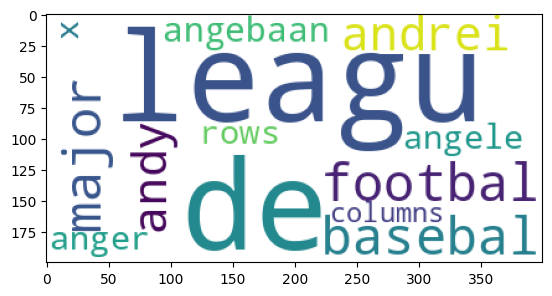

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as mplot

oc_cloud= WordCloud(background_color='white', max_words=200,
                    max_font_size=100,random_state=1).generate(str(df)[29:])
mplot.imshow(oc_cloud)

Let's find someone

In [ ]:
query = {
  "query": {
    "query_string": {
      "default_field": "abstract",
      "query": "famous musician and artist",
      "default_operator": "OR"
    }
  }
}


response = es_client.search(index="persons_wiki",body=query)

print(f'{response["hits"]["total"]["value"]} founded!')
best_nophrase = response["hits"]["hits"][0]
for pet in  response["hits"]["hits"][:5]:
  print(pet["_source"])

51 founded!
{'Unnamed: 0': 934, 'URI': '<http://dbpedia.org/resource/Anton_Hecht>', 'name': 'Anton Hecht', 'abstract': 'Anton Hecht is an English artist born in London. In 2007 he asked musicians from around the Durham area to contribute to a soundtrack for a film. In 2005 he was one of seven artists involved in a project to recreate the Cumbrian town of Whitehaven in Lego.', 'keyphrases': ['recreate the Cumbrian town of Whitehaven in Lego.']}
{'Unnamed: 0': 778, 'URI': '<http://dbpedia.org/resource/Lemi_Ghariokwu>', 'name': 'Lemi Ghariokwu', 'abstract': 'Lemi Ghariokwu (born Emmanuel Sunday; 26 December 1955), also known simply as Lemi, is a Nigerian artist, illustrator and designer who is most renowned for providing many of the original cover images for the recordings of Nigerian musician Fela Kuti.', 'keyphrases': ['Lemi Ghariokwu', 'Lemi,', 'cover images', 'illustrator']}
{'Unnamed: 0': 47, 'URI': '<http://dbpedia.org/resource/Vanessa_Ament>', 'name': 'Vanessa Ament', 'abstract': "

Not bad, but lets include our keyphrase computation

In [ ]:
query = {
  "query": {
    "bool": {
      "should": [
        {
          "query_string": {
            "default_field": "abstract",
            "query": "famous musician and artist",
            "default_operator": "OR"
          }
        },
         {
          "query_string": {
            "default_field": "keyphrases",
            "query": "famous musician and artist",
            "default_operator": "OR"
          }
        }
      ]
    }
  }
}

response = es_client.search(index="persons_wiki",body=query)
best_phrase = response["hits"]["hits"][0]
print(f'{response["hits"]["total"]["value"]} founded!')
for pet in  response["hits"]["hits"][:5]:
  print(pet["_source"])

51 founded!
{'Unnamed: 0': 47, 'URI': '<http://dbpedia.org/resource/Vanessa_Ament>', 'name': 'Vanessa Ament', 'abstract': "Vanessa Theme Ament (born January 8, 1955 in Glendale, California) is an American author, academic, Foley artist, and musician, best known for her 2009 book The Foley Grail, one of the first monographs about the craft of Foley sound in movies and television. She currently teaches telecommunications at Ball State University. As a Foley artist, Ament has worked on such shows as Knots Landing, Dallas, and Cagney & Lacey, and such films as Prizzi's Honor, Platoon, Predator, Die Hard, Beauty and the Beast, Noises Off..., Batman Returns, and A Goofy Movie.", 'keyphrases': ['A Goofy Movie.', 'Batman Returns,', 'Beauty and the Beast,', 'Cagney & Lacey,', 'Dallas,', 'Die Hard,', 'Foley artist,', 'Foley sound', 'Knots Landing,', 'Platoon,', 'Predator,', 'The Foley Grail,', 'ment']}
{'Unnamed: 0': 934, 'URI': '<http://dbpedia.org/resource/Anton_Hecht>', 'name': 'Anton Hecht',

Let's  compare both champs

In [ ]:
print("No keyphrase")
print(best_nophrase["_source"]["abstract"])

print("with keyphrase")
print(best_phrase["_source"]["abstract"])

No keyphrase
Anton Hecht is an English artist born in London. In 2007 he asked musicians from around the Durham area to contribute to a soundtrack for a film. In 2005 he was one of seven artists involved in a project to recreate the Cumbrian town of Whitehaven in Lego.
with keyphrase
Vanessa Theme Ament (born January 8, 1955 in Glendale, California) is an American author, academic, Foley artist, and musician, best known for her 2009 book The Foley Grail, one of the first monographs about the craft of Foley sound in movies and television. She currently teaches telecommunications at Ball State University. As a Foley artist, Ament has worked on such shows as Knots Landing, Dallas, and Cagney & Lacey, and such films as Prizzi's Honor, Platoon, Predator, Die Hard, Beauty and the Beast, Noises Off..., Batman Returns, and A Goofy Movie.


"attention is all you need" 💪

## Extract sentences

Let's try another aproach, until now we have a big raw text, we will now split the text in small pieces (sentences) this might help for example to create a statements corpus and not a full text (ideas segmentation)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
sent_tokenize(pf_df.iloc[0].abstract)

['Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL).',
 'From Western Australia, Morrell played his early senior football for West Perth.',
 "His 44-game senior career for the Falcons spanned 1998–2000, and he was the club's leading goalkicker in 2000.",
 'At the age of 21, Morrell was recruited to the Australian Football League by the Kangaroos Football Club with its third round selection in the 2001 AFL Rookie Draft.',
 'As a forward he twice kicked five goals during his time with the Kangaroos.',
 'The first was in a losing cause against Sydney in 2002 and the other the following season in a drawn game against Brisbane.']

In [ ]:
pf_df["sentences"] = pf_df["abstract"].progress_map(sent_tokenize)

  0%|          | 0/861 [00:00<?, ?it/s]

In [ ]:
pf_df.to_csv('drive/MyDrive/Colab Notebooks/archive/people-wiki-1000-sentences.csv')

Now , we will reindex with sentence captions and lets test

In [ ]:
index_es_data("persons_wiki", pf_df)

deleting the 'persons_wiki' index.
Response from server: {'acknowledged': True}
creating the 'persons_wiki' index.
Response from server: {'acknowledged': True, 'shards_acknowledged': True, 'index': 'persons_wiki'}
bulk index the data
Errors: False, Num of records indexed: 861


##Embedding with BERT

Finally lets convert our sentences into embeddings using BERT
https://www.sbert.net/

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
sentence_embeddings = model.encode(pf_df.iloc[0].sentences)
print("Sentence:", pf_df.iloc[0].sentences[0])
print("Embedding:", sentence_embeddings[0])
print(len(sentence_embeddings[0]))

Sentence: Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL).
Embedding: [-1.30173843e-02  1.30619742e-02  2.90479958e-02 -4.74830605e-02
 -1.43993217e-02 -1.64766591e-02  8.57027248e-03  2.18191333e-02
 -4.36932733e-03  7.09231794e-02 -2.25421898e-02 -3.83663625e-02
 -4.90375534e-02  4.48670611e-02  5.40922619e-02  1.98216550e-02
 -1.66450724e-01  4.39037010e-02  2.67239939e-02 -5.97424656e-02
 -7.61783123e-02  4.89635766e-02 -5.83705194e-02 -5.32616675e-02
 -1.24983517e-02 -2.57997662e-02  7.53669348e-03  1.03730790e-01
 -3.68378460e-02 -2.78795753e-02  5.89141920e-02  1.52291562e-02
  3.07194795e-02  1.11686513e-02 -2.82966625e-02  5.54895203e-04
  3.19148377e-02 -1.21165328e-02 -6.67644665e-02  6.26004860e-02
 -9.45455302e-03  8.41820519e-03 -1.66607425e-02  3.19028422e-02
 -7.52678290e-02 -4.69730757e-02 -8.61268304e-03 -5.63052259e-02
 -5.56200463e-03  3.04660127e-02 -5.297

In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()
pf_df["embeddings"] = pf_df["sentences"].progress_map(model.encode)

  0%|          | 0/861 [00:00<?, ?it/s]

In [ ]:
pf_df.to_csv('drive/MyDrive/Colab Notebooks/archive/people-wiki-1000-embeddings.csv')

In [ ]:
index_es_data("persons_wiki", pf_df)

deleting the 'persons_wiki' index.
Response from server: {'acknowledged': True}
creating the 'persons_wiki' index.
Response from server: {'acknowledged': True, 'shards_acknowledged': True, 'index': 'persons_wiki'}
bulk index the data
Errors: False, Num of records indexed: 861


Lets try first without embeddings

In [ ]:
query = {
  "query": {
    "bool": {
      "should": [
        {
          "query_string": {
            "default_field": "sentences",
            "query": "what famous footballer  played with the Kangaroos?",
            "default_operator": "OR"
          }
        },
         {
          "query_string": {
            "default_field": "keyphrases",
            "query": "what famous footballer  played with the Kangaroos?",
            "default_operator": "OR"
          }
        }
      ]
    }
  }
}

response = es_client.search(index="persons_wiki",body=query)
best_no_embeddings = response["hits"]["hits"][0]
print(f'{response["hits"]["total"]["value"]} founded!')
for pet in  response["hits"]["hits"][:5]:
  print(pet["_source"])

103 founded!
{'Unnamed: 0': 246, 'URI': '<http://dbpedia.org/resource/Marcus_Vick>', 'name': 'Marcus Vick', 'abstract': 'Marcus Deon Vick (born March 20, 1984) is a former American football quarterback. He played college football at Virginia Tech, following the career path of his older brother Michael. However, several legal infractions and unsportsmanlike play led to Vick being dismissed from the school in 2006. Vick joined the Miami Dolphins of the National Football League (NFL) the same year as an undrafted free agent, but was released after appearing in only one game. Since the end of his playing career, he has continued to face various legal troubles.', 'keyphrases': ['(NFL)', 'American football', 'Marcus Deon', 'Miami Dolphins', 'National Football League', 'Virginia Tech', 'college football', 'legal infractions', 'legal troubles.', 'undrafted free agent,', 'unsportsmanlike play'], 'sentences': ['Marcus Deon Vick (born March 20, 1984) is a former American football quarterback.', '

Now, let embeddings do magic

In [ ]:
query = {
  "query": {

    "bool": {
      "should": [

        {
              "nested": {
              "path": "embeddings",
              "score_mode": "max",
              "query": {
                "function_score": {
                  "script_score": {
                    "script": {
                      "source": "(1.0+cosineSimilarity(params.query_vector, 'embeddings.vector'))",
                      "params": {"query_vector": model.encode("what famous footballer  played with the Kangaroos?")}
                    }
                  },
                  "min_score":1.5
                }
              }
            }
        }
      ]
    }
  }
}


response = es_client.search(index="persons_wiki",body=query)
best_embeddings = response["hits"]["hits"][0]
print(f'{response["hits"]["total"]["value"]} founded!')
for pet in  response["hits"]["hits"][:5]:
  print(pet["_source"])

3 founded!
{'Unnamed: 0': 0, 'URI': '<http://dbpedia.org/resource/Digby_Morrell>', 'name': 'Digby Morrell', 'abstract': "Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL). From Western Australia, Morrell played his early senior football for West Perth. His 44-game senior career for the Falcons spanned 1998–2000, and he was the club's leading goalkicker in 2000. At the age of 21, Morrell was recruited to the Australian Football League by the Kangaroos Football Club with its third round selection in the 2001 AFL Rookie Draft. As a forward he twice kicked five goals during his time with the Kangaroos. The first was in a losing cause against Sydney in 2002 and the other the following season in a drawn game against Brisbane.", 'keyphrases': ['(AFL).', 'AFL', 'Australian Football League', 'Australian rules footballer', 'Carlton', 'Kangaroos', 'Kangaroos.', 'Morrell', 'West Perth.', 'k

If we reduce the minimum score we will include  smaller cosine distances (less semantic relevance)

In [ ]:
query = {
  "query": {

    "bool": {
      "should": [

        {
              "nested": {
              "path": "embeddings",
              "score_mode": "max",
              "query": {
                "function_score": {
                  "script_score": {
                    "script": {
                      "source": "(1.0+cosineSimilarity(params.query_vector, 'embeddings.vector'))",
                      "params": {"query_vector": model.encode("what famous footballer  played with the Kangaroos?")}
                    }
                  },
                  "min_score":1.1
                }
              }
            }
        }
      ]
    }
  }
}


response = es_client.search(index="persons_wiki",body=query)
best_embeddings = response["hits"]["hits"][0]
print(f'{response["hits"]["total"]["value"]} founded!')
for pet in  response["hits"]["hits"][:5]:
  print(pet["_source"])

743 founded!
{'Unnamed: 0': 0, 'URI': '<http://dbpedia.org/resource/Digby_Morrell>', 'name': 'Digby Morrell', 'abstract': "Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL). From Western Australia, Morrell played his early senior football for West Perth. His 44-game senior career for the Falcons spanned 1998–2000, and he was the club's leading goalkicker in 2000. At the age of 21, Morrell was recruited to the Australian Football League by the Kangaroos Football Club with its third round selection in the 2001 AFL Rookie Draft. As a forward he twice kicked five goals during his time with the Kangaroos. The first was in a losing cause against Sydney in 2002 and the other the following season in a drawn game against Brisbane.", 'keyphrases': ['(AFL).', 'AFL', 'Australian Football League', 'Australian rules footballer', 'Carlton', 'Kangaroos', 'Kangaroos.', 'Morrell', 'West Perth.', 

A full 100% embedding function for a FAQ

In [ ]:
import numpy as np
from numpy.linalg import norm


def question(input):
  query_vector = model.encode(input)

  query = {
        "query": {

          "bool": {
            "should": [
              {
                    "nested": {
                    "path": "embeddings",
                    "score_mode": "max",
                    "query": {
                      "function_score": {
                        "script_score": {
                          "script": {
                            "source": "(1.0+cosineSimilarity(params.query_vector, 'embeddings.vector'))",
                            "params": {"query_vector": query_vector}
                          }
                        },
                        "min_score":1.3
                      }

                    }
                  }
              }
            ]
          }
        }
    }

  response = es_client.search(index="persons_wiki",body=query)
  if len(response["hits"]["hits"])>0:
    best_response = response["hits"]["hits"][0]
    second_response = response["hits"]["hits"][1]
    embeddings = [a["vector"] for a in best_response["_source"]["embeddings"]]
    return f'{best_response["_source"]["name"]} , {get_answer(query_vector,zip(embeddings,best_response["_source"]["sentences"]))} Source: {best_response["_source"]["URI"]} but also, {second_response["_source"]["name"]} , {get_answer(query_vector,zip(embeddings,second_response["_source"]["sentences"]))} Source: {second_response["_source"]["URI"]}'
  else:
    return "sorry, i don't know!"

def get_answer(query_vector, answers):
  best_answer=""
  best_answer_score=0.0
  for ans_vector,ans_text in answers:
    cosine = np.dot(query_vector,ans_vector)/(norm(query_vector)*norm(ans_vector))
    if cosine > best_answer_score:
      best_answer_score=cosine
      best_answer=ans_text
  return best_answer

In [ ]:
question("what famous footballer played with the Kangaroos?")

"Digby Morrell , As a forward he twice kicked five goals during his time with the Kangaroos. Source: <http://dbpedia.org/resource/Digby_Morrell> but also, Scott Guyett , He was released two years later, and after a short spell with Dorchester Town, moved to Crystal Palace to work as the club's Fitness Coach. Source: <http://dbpedia.org/resource/Scott_Guyett>"

In [ ]:
question("who is an musician and an artist?")

'Peter Flannery , Other theatre work has included Singer (1989). Source: <http://dbpedia.org/resource/Peter_Flannery> but also, Menwar , Honoré was named Artist of the Year by French radio station Radio France Internationale. Source: <http://dbpedia.org/resource/Menwar>'

In [ ]:
question("do you know any music producer and DJ?")

'Cajjmere Wray , He is known for a variety of his original and remix productions. Source: <http://dbpedia.org/resource/Cajjmere_Wray> but also, Bartosz Brenes , He began his career as a DJ at the age of 16 in Belgium, and quickly started touring throughout Europe. Source: <http://dbpedia.org/resource/Bartosz_Brenes>'

In [ ]:
question("I want to know about a filmaker and painter")

'Brent Nicholson Earle , In his professional life, he worked in New York City as an actor, writer, stage manager, lecturer, archivist, photographer, optical designer, curator and art gallery administrator. Source: <http://dbpedia.org/resource/Brent_Nicholson_Earle> but also, Joerg Steineck , As a filmmaker he often explores subcultures such as underground music genres and stories of people who exist parallel to or on the edge of society. Source: <http://dbpedia.org/resource/Joerg_Steineck>'

We have explore the input ask for someone and get the answer based on statements, however if we look for a general answer question this answer mechanism is not so efficient as a generative layer

In [ ]:
question("what subcultres does joerg steineck explored?")

'Joerg Steineck , Joerg Steineck is a German filmmaker and audiovisual artist who is based in Berlin. Source: <http://dbpedia.org/resource/Joerg_Steineck> but also, Gerald Steinacher , Gerald Steinacher (born 2 September 1970) is Professor of History and Hymen Rosenberg Professor of Judaic Studies at the University of Nebraska-Lincoln. Source: <http://dbpedia.org/resource/Gerald_Steinacher>'

Let's rebuild the function but now we will include a pipeline for context understanding so we might look for the answer inside the abstract. let's use a fine tunned roberta model based on a supervized learning method trained over Questions answers dataset SQuAd2 created by stanford

https://huggingface.co/deepset/roberta-base-squad2

https://rajpurkar.github.io/SQuAD-explorer/




In [ ]:
from transformers.models.auto import AutoModelForTableQuestionAnswering
import numpy as np
from numpy.linalg import norm

from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

nlp_QA = pipeline('question-answering', model="deepset/roberta-base-squad2", tokenizer="deepset/roberta-base-squad2")

def question(input):
  query_vector = model.encode(input)

  query = {
        "query": {

          "bool": {
            "should": [
                {
                  "query_string": {
                    "default_field": "sentences",
                    "query": input,
                    "default_operator": "OR"
                  }
                },
                {
                  "query_string": {
                    "default_field": "keyphrases",
                    "query": input,
                    "default_operator": "OR"
                  }
                },
                {

                  "query_string": {
                    "default_field": "name",
                    "query": input,
                    "default_operator": "OR"
                  }
                }
              ],
            "must":[
                {
                    "nested": {
                    "path": "embeddings",
                    "score_mode": "max",
                    "query": {
                      "function_score": {
                        "script_score": {
                          "script": {
                            "source": "(1.0+cosineSimilarity(params.query_vector, 'embeddings.vector'))",
                            "params": {"query_vector": query_vector}
                          }
                        },
                        "min_score":1.3
                      }

                    }
                  }
              }
            ]
          }
        }
    }

  response = es_client.search(index="persons_wiki",body=query)
  if len(response["hits"]["hits"])>0:
    best_response = response["hits"]["hits"][0]
    embeddings = [a["vector"] for a in best_response["_source"]["embeddings"]]
    answer = get_answer(best_response["_source"]["abstract"],input)
    return f'Answer:{answer["answer"]} , Context:{best_response["_source"]["abstract"]} ,Source: {best_response["_source"]["URI"]}'
  else:
    return "sorry, i don't know!"

def get_answer(context,question):
    QA_input = {
        'question': question,
        'context': context
    }
    return nlp_QA(QA_input)

In [ ]:
question("what subcultres does joerg steineck explored?")

'Answer:underground music genres and stories of people , Context:Joerg Steineck is a German filmmaker and audiovisual artist who is based in Berlin. As a filmmaker he often explores subcultures such as underground music genres and stories of people who exist parallel to or on the edge of society. He seeks to tell common but nevertheless extraordinary stories, and generate unique audiovisual atmospheres. Steineck also works as a painter, graphic artist and illustrator. ,Source: <http://dbpedia.org/resource/Joerg_Steineck>'

Building real NLP solutions depends on a high stack of methods, models and databases. In this notebook we have build a solution by the integration of several of this technologies, however it is important to consider the techincal aspects not explored in this notebook. it is desired to create a more sofisticated and parallel data pipeline for preprocessing and indexing time. Also on query time models and tokenizers consume hugh amounts of RAM , consider a microservice architecture and containers for horizontal scaling deployments.